In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
df = pd.read_csv('applicants(given).csv')
df.describe()

,Timestamp,Email Address,Name,BITS ID,Vertical you wish to apply for
count,679,679,679,679,679
unique,678,625,637,638,7
top,9/10/2023 1:47:17,f20230242@pilani.bits-pilani.ac.in,Devesh saraogi,F2023A2PS0242P,AI/ML
freq,2,3,3,3,195


#### _Removing duplicates_

We will be using email addresses as a sort of primary key to remove duplicates in the form

In [49]:
# Convert Timestamp to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# Using email address as primary key to remove duplicates
# df = df.drop_duplicates(subset=['BITS ID'])
df = df.drop_duplicates(subset=['Email Address'])
df

,Timestamp,Email Address,Name,BITS ID,Vertical you wish to apply for
0,2023-09-08 13:51:34,f20200148@pilani.bits-pilani.ac.in,Deep Pandya,2020A7PS0148P,AI/ML
1,2023-09-08 07:13:12,f20210134@pilani.bits-pilani.ac.in,Navya Krishnia,2021A4PS0134P,App-Dev
2,2023-09-06 22:34:02,f20211192@pilani.bits-pilani.ac.in,Anirudh Jaimini,2021B3A21192P,AI/ML
3,2023-09-08 14:11:32,f20211209@pilani.bits-pilani.ac.in,Aaditya Prasad,2021B5A41209P,App-Dev
4,2023-09-06 21:24:48,f20211589@pilani.bits-pilani.ac.in,Devraj Singh Sandhu,2021A1PS1589P,Competitive Coding
...,...,...,...,...,...
674,2023-09-08 22:28:19,f20231325@pilani.bits-pilani.ac.in,Aarav Shah,2023B5PS1325P,Back-End
675,2023-09-07 12:42:44,f20231334@pilani.bits-pilani.ac.in,Manas Mehta,2023B1PS1334P,Back-End
676,2023-09-09 22:56:40,f20231335@pilani.bits-pilani.ac.in,Nishit Garg,2023B1PS1335,Back-End
677,2023-09-07 10:29:28,f20231343@pilani.bits-pilani.ac.in,Sanyam jhamar,23023A8PS1343P,Front-End


#### _Order applicants in chronological order of submission of form._

In [50]:
#sort by timestamp
df = df.sort_values(by=['Timestamp'])
df

,Timestamp,Email Address,Name,BITS ID,Vertical you wish to apply for
214,2023-09-06 16:59:16,f20221227@pilani.bits-pilani.ac.in,Krishay,2022A3PS1227P,Design
617,2023-09-06 21:20:33,f20231053@pilani.bits-pilani.ac.in,Shourin Chakraborty,2023B4PS1053P,Back-End
43,2023-09-06 21:23:02,f20220124@pilani.bits-pilani.ac.in,Vishnu Chebolu,2022A7PS0124P,Competitive Coding
322,2023-09-06 21:23:56,f20230185@goa.bits-pilani.ac.in,Shashank sadashiv,2023A3PS0185G,Back-End
509,2023-09-06 21:24:18,f20230653@pilani.bits-pilani.ac.in,VULLI ABHINAV,2023A7PS0653P,Front-End
...,...,...,...,...,...
138,2023-09-11 23:26:02,f20220920@pilani.bits-pilani.ac.in,Sahitya Singh,2022B4A70920P,Back-End
552,2023-09-12 00:16:04,f20230771@pilani.bits-pilani.ac.in,Yash Sahoo,2023AAPS0771P,Competitive Coding
568,2023-09-12 00:25:33,f20230831@pilani.bits-pilani.ac.in,vyoma kalra,2023B1PS0831P,App-Dev
60,2023-09-12 02:17:01,f20220247@pilani.bits-pilani.ac.in,Lakshya Jain,2022AAPS0247P,Front-End


#### Checking if there are any duplicates in the emails, name or ids

In [51]:
# showinng the non-unique email addresses
df[df['Name'].duplicated(keep=False)]

,Timestamp,Email Address,Name,BITS ID,Vertical you wish to apply for
469,2023-09-07 13:20:46,f20230551@pilani.bits-pilani.ac.in,Dhruv Gupta,f20230551@pilani.bits-pilani.ac.in,Competitive Coding
382,2023-09-07 15:02:35,f20230355@goa.bits-pilani.ac.in,Dhruv Gupta,2023A7PS0355G,AI/ML


In [52]:
df[df['Email Address'].duplicated(keep=False)]

,Timestamp,Email Address,Name,BITS ID,Vertical you wish to apply for


In [53]:
df[df['BITS ID'].duplicated(keep=False)]

,Timestamp,Email Address,Name,BITS ID,Vertical you wish to apply for


#### _Some people have written slightly incorrect IDs, like some people have added an F, while some have accidentally provided their emails. Fix this._

In [54]:
# convert object to string
df["BITS ID"] = df["BITS ID"].astype(str)
df.dtypes

Timestamp                         datetime64[ns]
Email Address                             object
Name                                      object
BITS ID                                   object
Vertical you wish to apply for            object
dtype: object

In [174]:
condition1 = df['BITS ID'].str[0].str.lower() == 'f'
condition2 = df['BITS ID'].str.endswith('in')
# Replace the values in the BITS ID column where they put email address instead of BITS ID with "NO ID Given"
df.loc[condition1 & condition2, "BITS ID"] = "No ID Given" 

In [175]:
#Removing the F from the BITS ID
df['BITS ID'] = df['BITS ID'].str.replace('[fF]', '')

/var/folders/yw/g5dzx43n0w92csjc3pypf8mc0000gp/T/ipykernel_13594/1643296695.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['BITS ID'] = df['BITS ID'].str.replace('[fF]', '')


In [176]:
# Adding P to the end of the BITS ID for the students who have not added it
condition = df['BITS ID'].str.endswith('P') == False
df.loc[condition, "BITS ID"] = df.loc[condition, "BITS ID"] + "P"

#### _Draw matplotlib graphs of people from different verticals and years._

In [177]:
# get the unique values of the Vericals applied for
all_vertical = df['Vertical you wish to apply for'].unique()
all_batches = np.array(["2019","2020","2021","2022","2023"])

# Making a dictionary of the verticals and their corresponding count of applicants with respect to their batch
vertical_dict = {}
total_vertical_dict = {}

for i in all_vertical:
    vertical_dict[i] = {}
    total_vertical_dict[i] = (df['Vertical you wish to apply for'] == i).sum()
    for j in all_batches:
        condition1 = df['Vertical you wish to apply for'] == i
        condition2 = df['Email Address'].str.contains(j)
        vertical_dict[i][j] = (condition1 & condition2).sum()

# Sorting the dictionary in descending order
total_vertical_dict = dict(sorted(total_vertical_dict.items(), key=lambda item: item[1], reverse=True))
total_vertical_dict = pd.DataFrame.from_dict(total_vertical_dict, orient='index', columns=['Total Applicants'])
total_vertical_dict = total_vertical_dict.reindex(sorted(total_vertical_dict.columns), axis=1)
total_vertical_dict


,Total Applicants
AI/ML,184
Competitive Coding,135
Back-End,95
Front-End,91
App-Dev,49
Cybersecurity,39
Design,32


In [178]:
# Converting the dictionary to a dataframe
vertical_dict = pd.DataFrame(vertical_dict)
# vertical_dict = vertical_dict.transpose()

# Adding the total column
vertical_dict['Total'] = vertical_dict.sum(axis=1)

# Sorting the columns and rows
vertical_dict = vertical_dict.reindex(sorted(vertical_dict.columns), axis=1)
vertical_dict = vertical_dict.reindex(sorted(vertical_dict.index), axis=0)

vertical_dict

,AI/ML,App-Dev,Back-End,Competitive Coding,Cybersecurity,Design,Front-End,Total
2019,0,0,0,0,0,0,0,0
2020,1,0,0,0,0,0,0,1
2021,5,3,0,2,0,0,1,11
2022,73,21,37,60,8,21,44,264
2023,106,25,58,74,31,11,46,351


In [179]:
# Removing the total column
vertical_df = vertical_dict.drop(columns=['Total'])

vertical_df = vertical_df.transpose()

# Sorting the df by alphabetical order of the verticals
vertical_df = vertical_df.reindex(sorted(vertical_df.columns), axis=1)
# Sorting the df by alphabetical order of the batches
vertical_df = vertical_df.reindex(sorted(vertical_df.index), axis=0)

vertical_df

,2019,2020,2021,2022,2023
AI/ML,0,1,5,73,106
App-Dev,0,0,3,21,25
Back-End,0,0,0,37,58
Competitive Coding,0,0,2,60,74
Cybersecurity,0,0,0,8,31
Design,0,0,0,21,11
Front-End,0,0,1,44,46


### Make the following graphs:
1. Verticals vs Total Applicants
2. Verticals vs Total Applicants vs Batch
3. Verticals vs Batch
4. Verticals vs Batch vs Total Applicants

<Axes: >

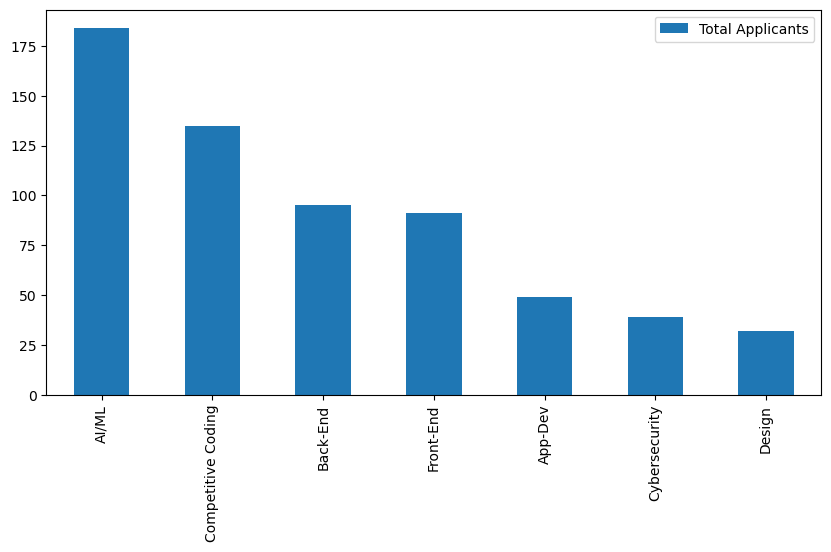

In [185]:
# 1. Verticals vs Total Applicants
total_vertical_dict.plot(kind='bar', figsize=(10, 5))

array([<Axes: ylabel='Total Applicants'>], dtype=object)

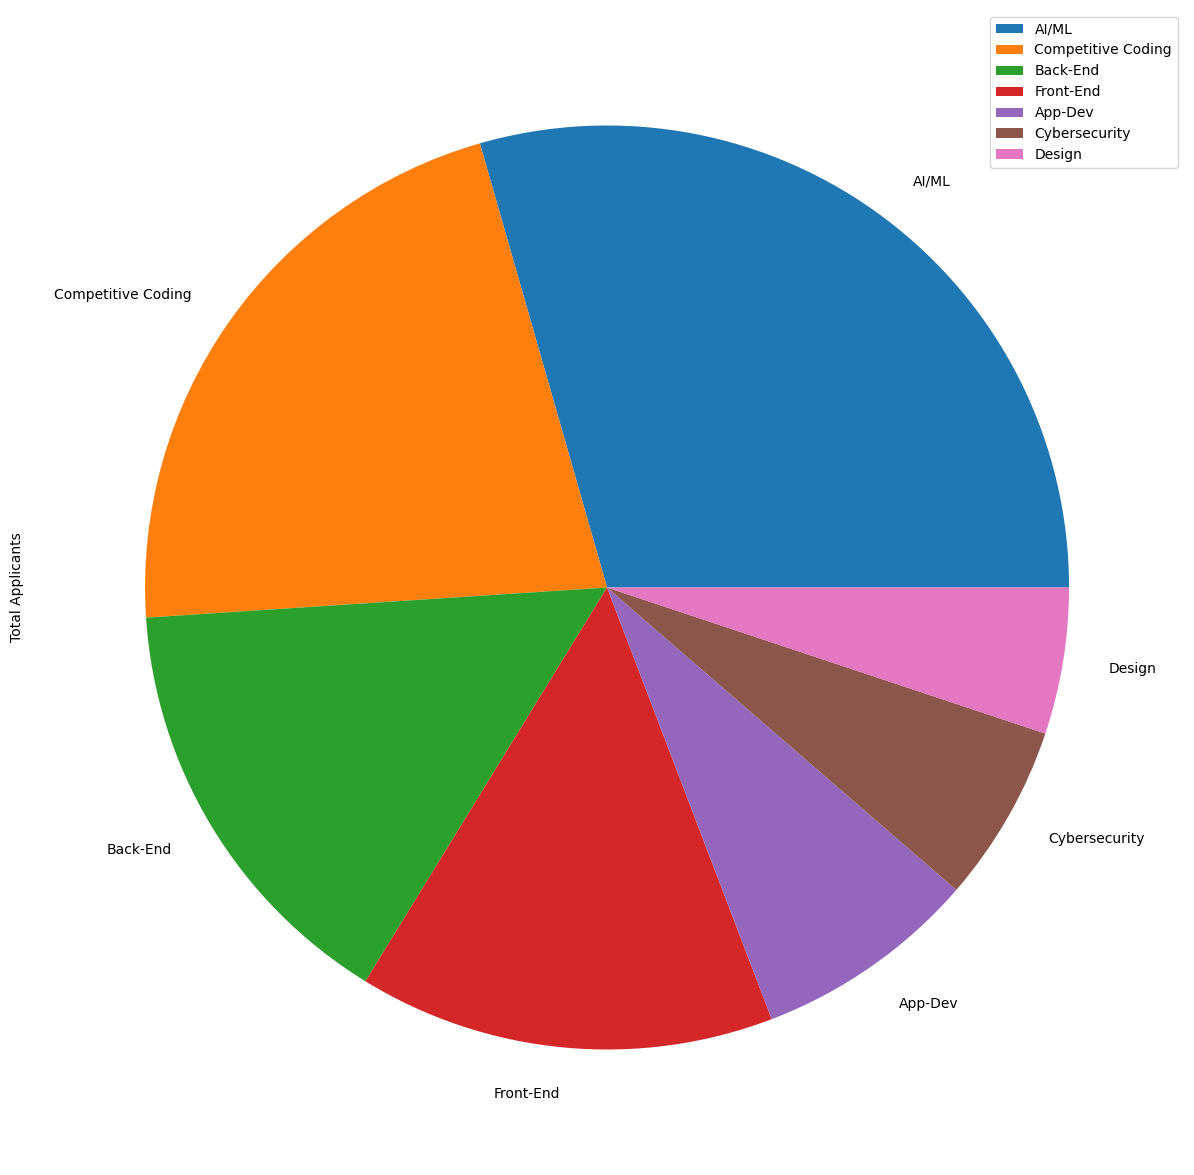

In [197]:
# 1. Verticals vs Total Applicants
total_vertical_dict.plot(kind='pie', subplots=True, figsize=(15, 15))

<Axes: >

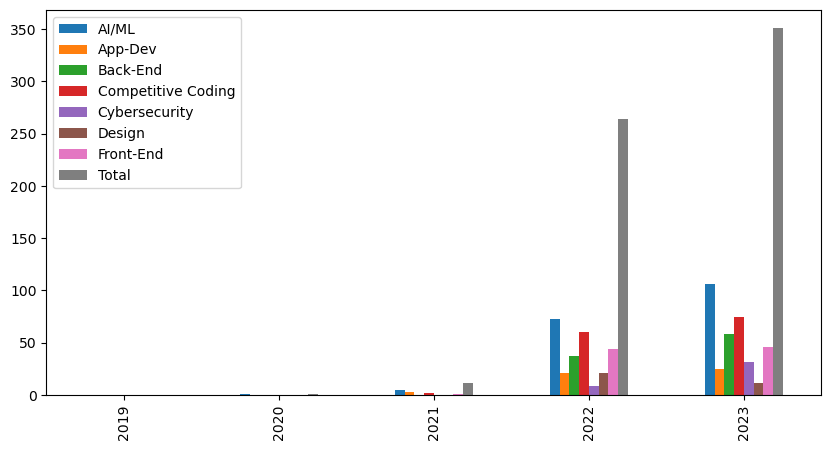

In [198]:
# 2. Verticals vs Total Applicants vs Batch
vertical_dict.plot(kind='bar', figsize=(10, 5))

<Axes: >

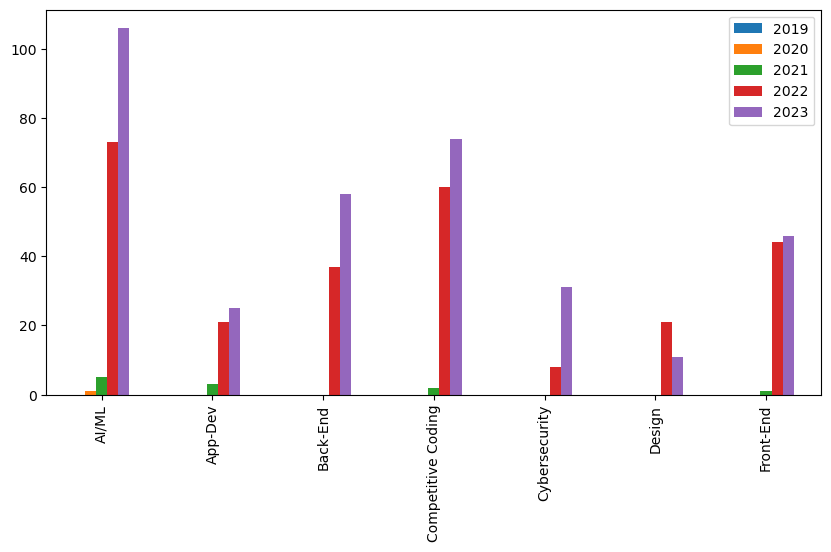

In [199]:
# 3. Verticals vs Batch
vertical_df.plot(kind='bar', figsize=(10, 5))

<Axes: >

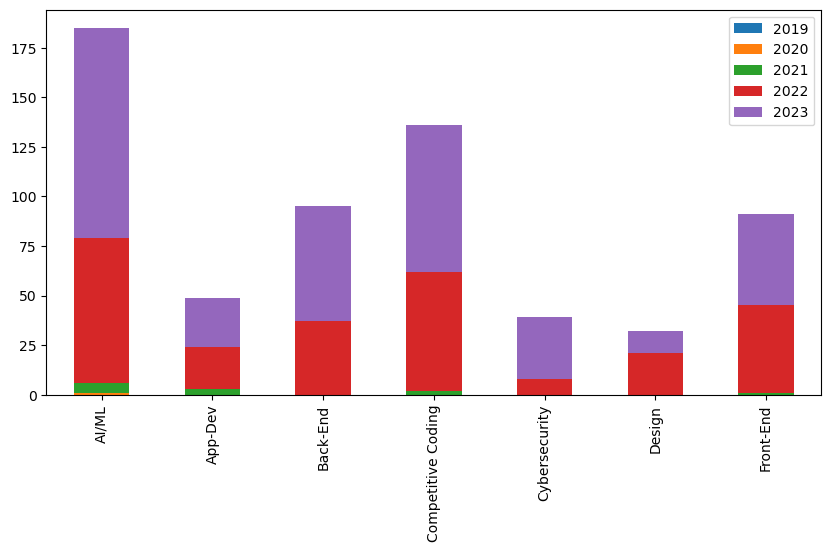

In [200]:
# 4. Verticals vs Batch vs Total Applicants
vertical_df.plot(kind='bar', stacked=True, figsize=(10, 5))

#### _Save this data as applicants.csv._

In [201]:
df.to_csv('applicants.csv', index=False)

#### _Segregate people into different verticals and save this data as aiml.csv, frontend.csv, appd.csv and so on._

In [212]:
for i in all_vertical:
    print(i.replace('/', ''))
    df[df['Vertical you wish to apply for'] == i].to_csv(i.replace('/', '') + '.csv', index=False)

Design
Back-End
Competitive Coding
Front-End
AIML
App-Dev
Cybersecurity
